# ITMAL Exercise


## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  

You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\by{\mathbf{y}}
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand\st[1]{_{\scriptsize #1}}
\newcommand\myfrac[2]{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ba
 p &= \myfrac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weights could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \myfrac{pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

Also notice, that the layout of this matrix is different of what is given in [HOML], "Confusion Matrix", p.92/fig 3-2. This is just a minor issue, since we can always flip/rotate/transpose the matrix (say by flipping the $\by\st{true}$ and $\by\st{pred}$ arguments). 

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion}~~~ =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="https://blackboard.au.dk/bbcswebdav/courses/BB-Cou-UUVA-94506/Fildeling/L02/Figs/performance_metrics.jpg" alt="WARNING: you need to be logged into Blackboard to view images" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

Implement a general accuracy function `MyAccuracy(y_true, y_pred)`. Again, implement the function you self from scratch, i.e. do not use any helper functions from Scikit-learn (implementing via `sklearn.metrics.confusion_matrix` is also not allowed, othewise you will then learn nothing!)

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOML]).

Compare your accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

(Implementation note: what do you do, if the denominator is zero?)

In [2]:
from sklearn.datasets import fetch_openml
def MNIST_GetDataSet():
    X, y = fetch_openml('mnist_784', return_X_y=True)
    X=X/255
    return X,y
import numpy as np
X, y = MNIST_GetDataSet()

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

# rescale the data, use the traditional train/test split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train = y_train.astype(np.int8)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


X.shape=(70000, 784)
X.shape=(70000, 784)


In [3]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
## Fitting the linear model with Stochastic Gradient Descent against the target digit "5"
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [4]:
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
## Dummy classifier --> classfies every input as not-5
## only "wrong" when input is a 5. 
class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
DummyClassifierobj = DummyClassifier()
DummyClassifierobj.fit(X_train)

In [5]:
# TODO: Qa...
from sklearn.metrics import accuracy_score
import math
def MyAccuracy(y_true, y_pred):
    ## Taking the True positive and True Negative in one variable TpTn
    TpTn = y_true==y_pred
    ## Dividing by the number of samples
    return np.average(TpTn)
    # TODO: you impl here

    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")
    eps=1E-9 # remember to import math for fabs
    assert math.fabs(a0-a1)<eps, "the method MyAccuray is not aligned with Skiimage accuracy score" 
TestAccuracy(y_train_5, DummyClassifierobj.predict(X_train))



my a          =0.90965
scikit-learn a=0.90965


In [6]:
TestAccuracy(y_train_5, sgd_clf.predict(X_train))


my a          =0.9749333333333333
scikit-learn a=0.9749333333333333


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

(Implementation note: as before, what do you do, if the denominator is zero?)

In [7]:

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_5, DummyClassifierobj.predict(X_train)))
print(confusion_matrix(y_train_5,sgd_clf.predict(X_train)))

[[54579     0]
 [ 5421     0]]
[[54250   329]
 [ 1175  4246]]


In [9]:
#https://stackoverflow.com/questions/61193476/constructing-a-confusion-matrix-from-data-without-sklearn
def comp_confmat(real, pred):

    labels = np.unique(real) # Taking the different classes
    my_matrix = np.zeros((len(labels), len(labels))) # Conf matrix filled with zeros

    for i in range(len(labels)):
        for j in range(len(labels)):

            my_matrix[i, j] = np.sum((real == labels[i]) & (pred == labels[j]))

    return my_matrix
def division_possible_zero(n, d):
    return n / d if d else 0
## This method gives us a confusion matrix build as:
## Row1: TrueNegativ | FalsePositive
## Row2: FalseNegativ | True Positive
conf_matrix= comp_confmat(y_train_5, np.transpose(DummyClassifierobj.predict(X_train))[0])
print(conf_matrix)

[[54579.     0.]
 [ 5421.     0.]]


In [ ]:
from sklearn.metrics import precision_score
sklearn_precision=precision_score(y_train_5, sgd_clf.predict(X_train))
print(sklearn_precision)
sklearn_precision=precision_score(y_train_5, np.transpose(DummyClassifierobj.predict(X_train))[0])
print(sklearn_precision)

In [76]:
# TODO: Qb..
import numpy as np
from sklearn.metrics import precision_score,recall_score,f1_score

def MyPrecision(y_true, y_pred):
    if(y_pred.ndim!=1):
        y_pred=np.transpose(DummyClassifierobj.predict(X_train))[0]
    conf_matrix= comp_confmat(y_true,y_pred)
    my_precision=division_possible_zero(conf_matrix[1][1],(conf_matrix[1][1]+conf_matrix[0][1]))
    sklearn_precision=precision_score(y_true,y_pred)
    print(f"my Precision ={my_precision}")
    print(f"scikit-learn ={sklearn_precision}")
    return my_precision

def MyRecall(y_true, y_pred):
    if(y_pred.ndim!=1):
        y_pred=np.transpose(DummyClassifierobj.predict(X_train))[0]
    conf_matrix= comp_confmat(y_true,y_pred)
    my_recall=division_possible_zero(conf_matrix[1][1],(conf_matrix[1][1]+conf_matrix[1][0]))
    sklearn_recall=recall_score(y_true,y_pred)
    print(f"my  Recall   ={my_recall}")
    print(f"scikit-learn ={sklearn_recall}")
    return my_recall
def MyF1Score(y_true, y_pred):
    # TODO: you impl here
    if(y_pred.ndim!=1):
        y_pred=np.transpose(DummyClassifierobj.predict(X_train))[0]
    conf_matrix= comp_confmat(y_true,y_pred)
    my_precision=MyPrecision(y_true, y_pred)
    my_recall=MyRecall(y_true, y_pred)
    my_f1=division_possible_zero(2 * (my_precision* my_recall),(my_precision+ my_recall) )
    sklearn_f1=f1_score(y_true,y_pred)
    print(f"my  F1       ={my_f1}")
    print(f"scikit-learn ={sklearn_f1}")



In [77]:
# TODO: your test code here!
## First testing the SGD
MyPrecision(y_train_5, sgd_clf.predict(X_train))
MyRecall(y_train_5, sgd_clf.predict(X_train))
MyF1Score(y_train_5, sgd_clf.predict(X_train))

my Precision =0.9209331131296449
scikit-learn =0.9209331131296449
my  Recall   =0.8229109020475927
scikit-learn =0.8229109020475927
my Precision =0.9209331131296449
scikit-learn =0.9209331131296449
my  Recall   =0.8229109020475927
scikit-learn =0.8229109020475927
my  F1       =0.869167072576717
scikit-learn =0.869167072576717


In [78]:
## Second testing the Dummy
MyPrecision(y_train_5, DummyClassifierobj.predict(X_train))
MyRecall(y_train_5, DummyClassifierobj.predict(X_train))
MyF1Score(y_train_5, DummyClassifierobj.predict(X_train))

my Precision =0
scikit-learn =0.0
my  Recall   =0.0
scikit-learn =0.0
my Precision =0
scikit-learn =0.0
my  Recall   =0.0
scikit-learn =0.0
my  F1       =0
scikit-learn =0.0


C:\Users\panda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_train_pred, y_train_5)
```

instead of 
```python
confusion_matrix(y_train_5, y_train_pred)
```

In [79]:
# TODO: Qc
# How come your confusion matrics only incude roughtly 20k when the original MNIST cotains 60k training samples?
# This assigment was performed on the original training size.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_5, DummyClassifierobj.predict(X_train)))
print(confusion_matrix(y_train_5,sgd_clf.predict(X_train)))
## This is the original confusion matrics and as stated in the documentary the columns are:
## Row1: TrueNegativ | FalsePositive
## Row2: FalseNegativ | True Positive

[[54579     0]
 [ 5421     0]]
[[54196   383]
 [  960  4461]]


In [84]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(DummyClassifierobj.predict(X_train),y_train_5))
print(confusion_matrix(sgd_clf.predict(X_train),y_train_5))
## Reversed giving us the confusion matrix as:
## Row1: TrueNegativ | FalseNegativ
## Row2: FalsePositive | True Positive

[[54579  5421]
 [    0     0]]
[[54196   960]
 [  383  4461]]


#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML] "Error Analysis", pp.102-105.

This heat map could be an important guide for you when analysing multiclass data in the future.

In [26]:
# TODO: Qd
M_dummy = confusion_matrix(DummyClassifierobj.predict(X_train),y_train_5)
M_SGD=confusion_matrix(sgd_clf.predict(X_train),y_train_5)

C:\Users\panda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


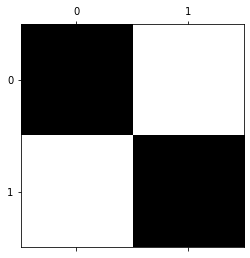

In [27]:
import matplotlib.pyplot as plt
row_sums=M_dummy.sum(axis=1,keepdims=True)
norm_conf_mx = M_dummy / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

<AxesSubplot:>

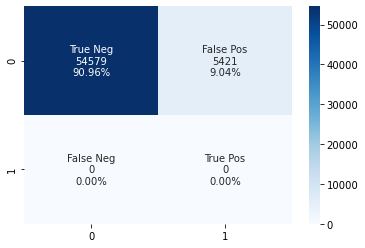

In [28]:
import seaborn as sns
## Used seaborn for a more elegant solution : https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                M_dummy.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     M_dummy.flatten()/np.sum(M_dummy)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(M_dummy, annot=labels, fmt='', cmap='Blues')


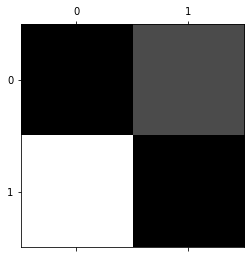

In [29]:
import matplotlib.pyplot as plt
row_sums=M_SGD.sum(axis=1,keepdims=True)
norm_conf_mx = M_SGD / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

<AxesSubplot:>

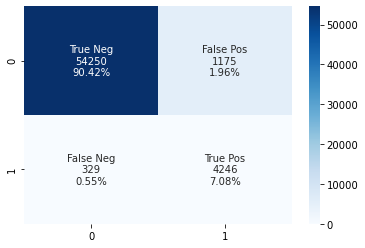

In [30]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                M_SGD.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     M_SGD.flatten()/np.sum(M_SGD)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(M_dummy, annot=labels, fmt='', cmap='Blues')

### Qe Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

In [93]:
# TODO: Qe concluding remarks in text..

REVISIONS||
---------||
2018-1219| CEF, initial.                  
2018-0207| CEF, updated.           
2018-0207| CEF, rewritten accuracy paradox section. 
2018-0305| CEF, updated with SHN comments.
2019-0901| CEF, updated for ITMAL v2.
2019-0904| CEF, updated for print-f and added conclusion Q.
2020-0125| CEF, F20 ITMAL update.
2020-0203| CEF, minor text fixes.
2020-0204| CEF, updated page numbers to HOMLv2.
2020-0217| CEF, added implementation note on denominator=0.
2020-0903| CEF, E20 ITMAL update, udpated figs paths.
2020-0906| CEF, added alt text.
2020-0907| CEF, updated HOML page refs.
2020-0921| CEF, fixed factor 2 error in beta-harmonic.
2021-0112| CEF, F21 ITMAL update, moved revision tabel.